# 1] Importing Libraries

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 2] Reading Data

In [2]:
# Load the CSV file
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/California_Houses.csv')

# Getting the Number of Fields and Records
num_columns = data.shape[1]
print("Number of Fields:", num_columns)

num_rows = data.shape[0]
print("Number of Records:", num_rows)

Mounted at /content/drive
Number of Fields: 14
Number of Records: 20640


# 3] Data Expoloration

In [3]:
# Display the first few records of the dataset
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

This shows us that all data features are numbers and non have NULL which is good so we don't need to generate dummy variables or remove records that has NULL in its features.

In [5]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

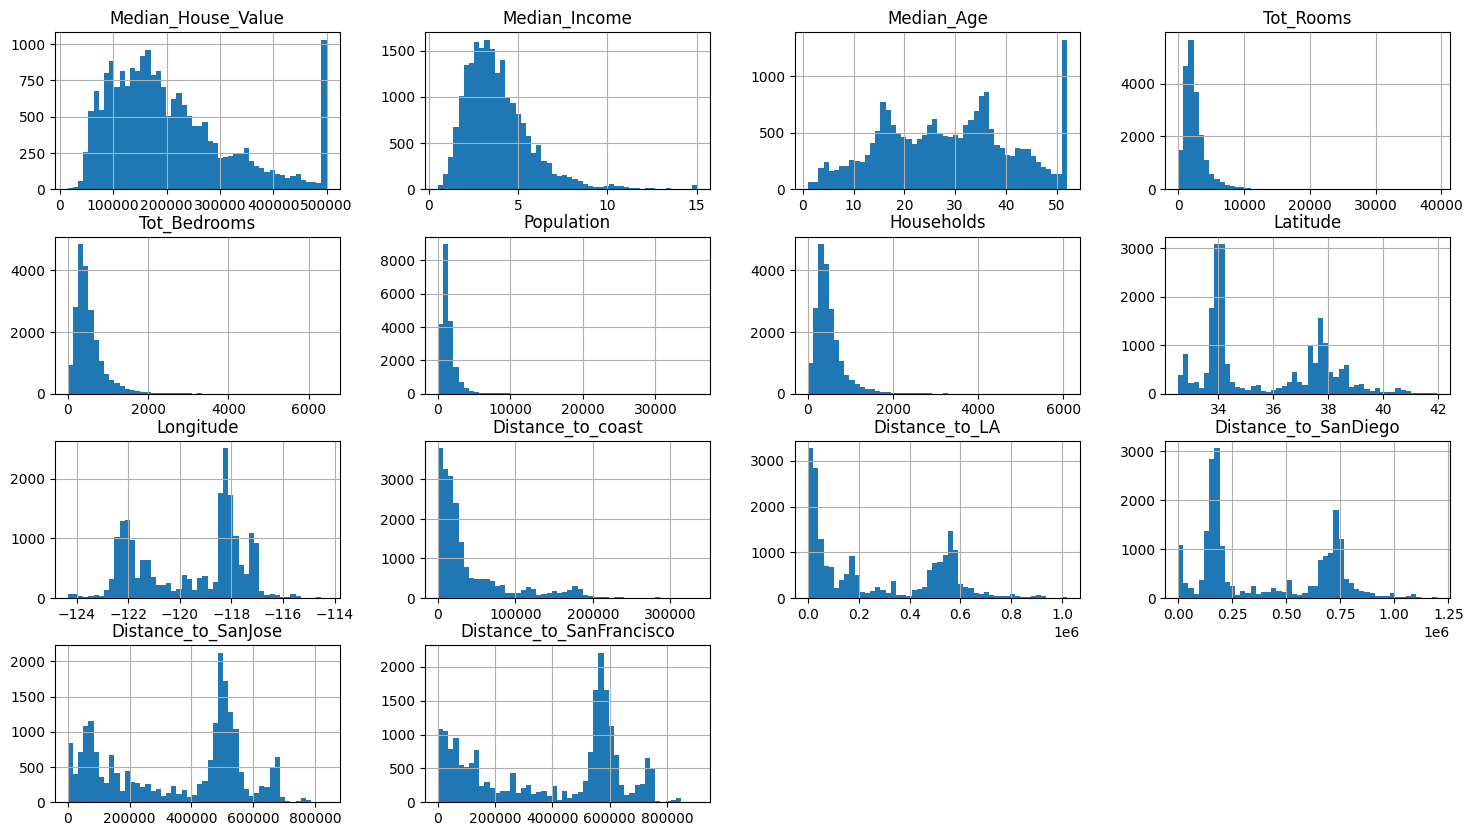

In [6]:
data.hist(bins=50,figsize=(18,10))

These histograms reveal a few things :


* The median house and the median house age value were capped
* Machine Learning algorithms may learn that prices will never go beyond that limit "$500,000"
* Some variables are tail heavy : they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns.??

In [7]:
#House value
mode_value = data["Median_House_Value"].mode().iloc[0]
print("Most frequent median_house_value:", mode_value)
selected_rows = data[data["Median_House_Value"] == mode_value]
print("Counts:", selected_rows.shape[0])

print("---------------------------------------------------------")

# House age
mode_age = data["Median_Age"].mode().iloc[0]
print("Most frequent median_age:", mode_age)
selected_rows = data[data["Median_Age"] == mode_age]
print("Counts:", selected_rows.shape[0])

Most frequent median_house_value: 500001.0
Counts: 965
---------------------------------------------------------
Most frequent median_age: 52
Counts: 1273


array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

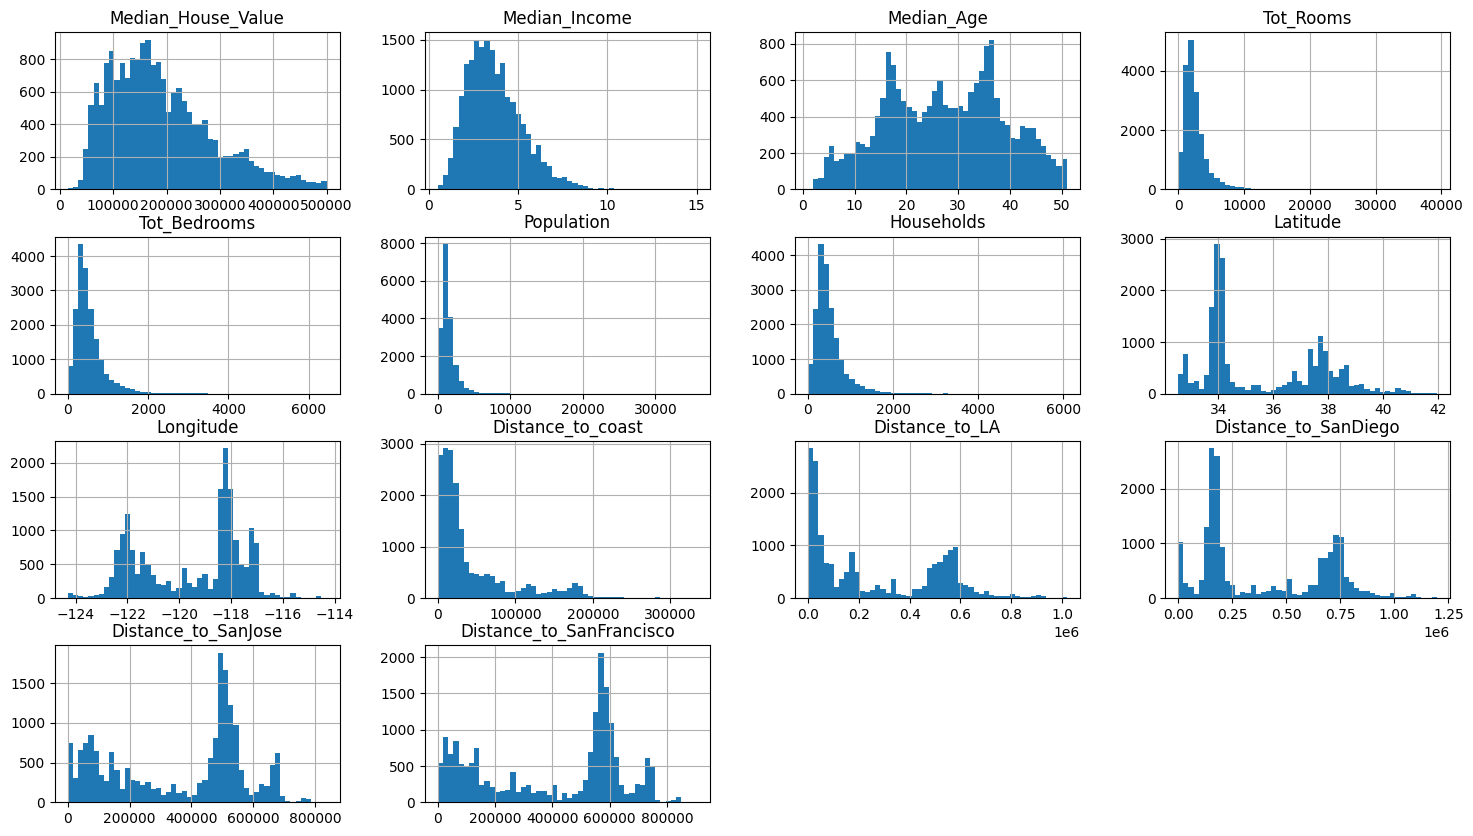

In [8]:
# Create a binary mask where 1 indicates that the value equals the mode
mask = (data["Median_House_Value"] == mode_value) | (data["Median_Age"] == mode_age)

# Use the mask to filter the DataFrame
data = data[~mask]

data.hist(bins=50,figsize=(18,10))

In [9]:
# Getting the New Number of Fields and Records
num_columns = data.shape[1]
print("Number of Fields:", num_columns)

num_rows = data.shape[0]
print("Number of Records:", num_rows)

Number of Fields: 14
Number of Records: 18572


# Visualization of Geographic Data

<Axes: xlabel='Longitude', ylabel='Latitude'>

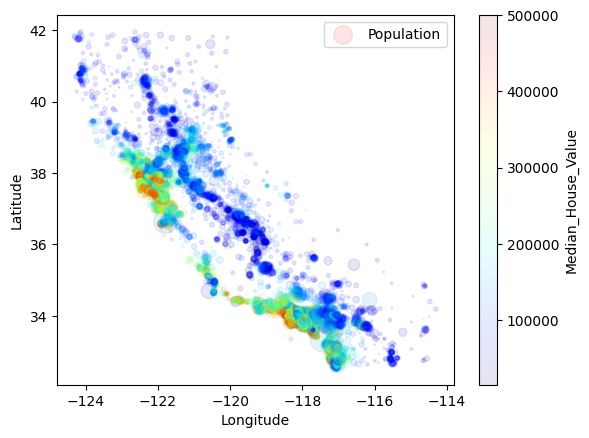

In [10]:
data.plot(kind="scatter", x="Longitude", y="Latitude",
             alpha=0.1, s=data["Population"]/100, label="Population",
            c="Median_House_Value", cmap=plt.get_cmap("jet"))

This plot takes the shape of the state of California. As it can be seen distance to the coast may be a useful attribute, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

In [11]:
data.corr()
corr_matrix=data.corr()
corr_matrix["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.661039
Tot_Rooms                   0.152606
Households                  0.100220
Tot_Bedrooms                0.080789
Population                  0.021616
Median_Age                  0.014772
Distance_to_SanFrancisco   -0.003306
Distance_to_SanJose        -0.020283
Longitude                  -0.022165
Distance_to_SanDiego       -0.122224
Distance_to_LA             -0.157445
Latitude                   -0.172126
Distance_to_coast          -0.485038
Name: Median_House_Value, dtype: float64

<Axes: >

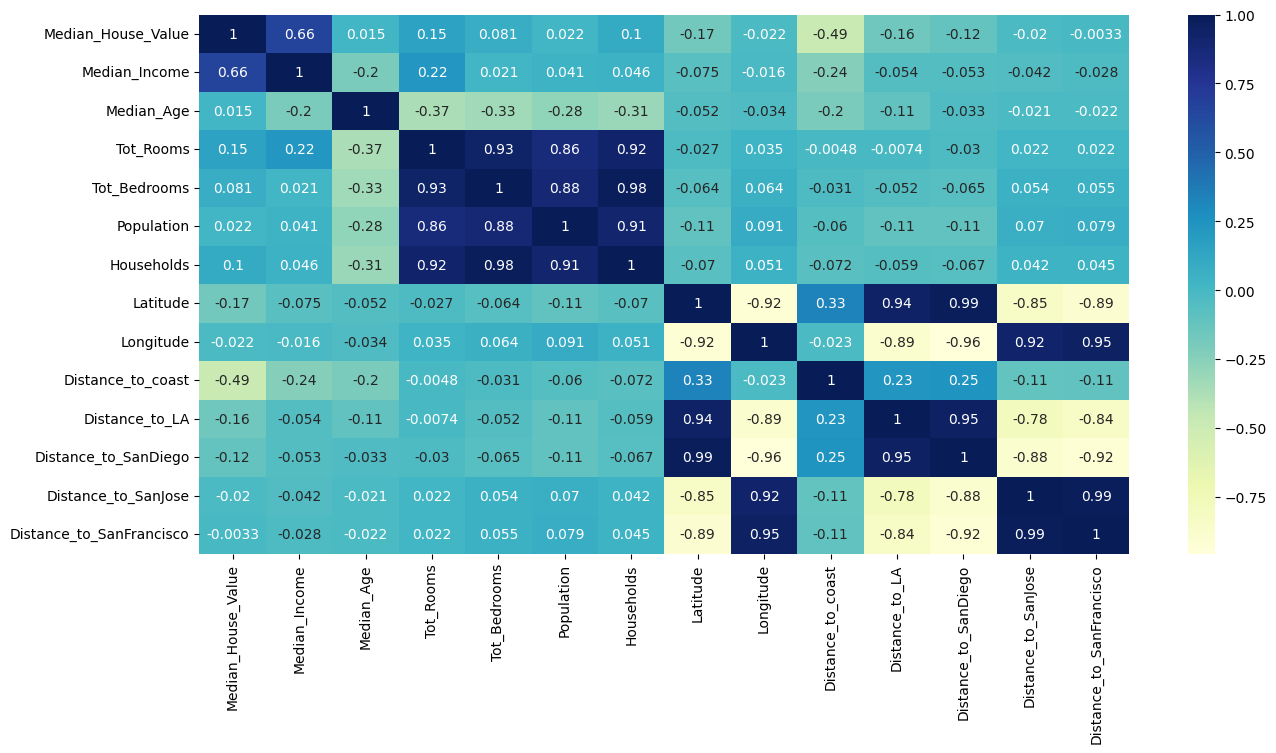

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

Large correlations are found between the median house value and income and inverse correlation between median house value and distance to the coast as was suspected



In [13]:
data["Median_income_cat"] = pd.cut (data["Median_Income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
data["Median_income_cat"].value_counts()

3    6660
2    6163
4    3373
5    1641
1     735
Name: Median_income_cat, dtype: int64

<Axes: >

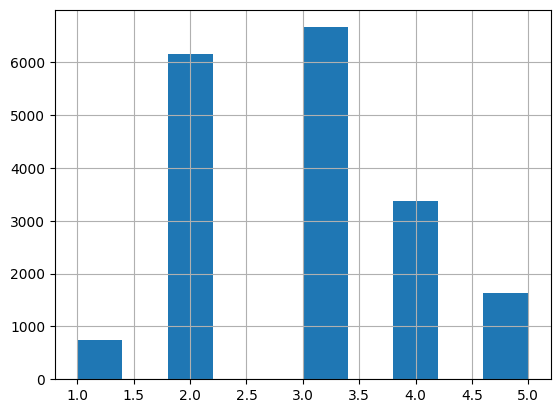

In [14]:
data["Median_income_cat"].hist()

# 3] Spliting data

In [15]:
# Randomly splitting the dataset into (70% Training + 15% Testing + 15% Validation)
data_train, data_temp = train_test_split(data, test_size = 0.3)
data_test, data_validate = train_test_split(data_temp, test_size = 0.5)

# Randomly splitting the dataset into (70% Training + 15% Testing + 15% Validation) Using Stratified
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state = 42)
for train_index, temp_index in split.split(data, data['Median_income_cat']):
    data_train_strat = data.iloc[train_index]
    data_temp_strat  = data.iloc[temp_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, validate_index in split2.split(data_temp_strat ,data_temp_strat['Median_income_cat']):
    data_test_strat = data_temp_strat.iloc[test_index]
    data_validate_strat = data_temp_strat.iloc[validate_index]


compare_props=pd.DataFrame({"Overall": data["Median_income_cat"].value_counts() / len(data),
                            "Stratified_training_Set": data_train_strat[ "Median_income_cat"].value_counts() / len(data_train_strat) ,
                            "Random_training_Set": data_train["Median_income_cat"].value_counts() / len(data_train) ,}).sort_index()

compare_props [ "Strat. error"]= 100*compare_props [ "Stratified_training_Set"] / compare_props [ "Overall"]-100
compare_props [ "Rand. error"]= 100*compare_props [ "Random_training_Set"]/ compare_props [ "Overall"]-100
compare_props

,Overall,Stratified_training_Set,Random_training_Set,Strat. error,Rand. error
1,0.039576,0.039538,0.040846,-0.094108,3.210173
2,0.331844,0.331846,0.326538,0.000759,-1.598697
3,0.358604,0.358615,0.358538,0.003077,-0.018374
4,0.181617,0.181615,0.183923,-0.001159,1.269475
5,0.088359,0.088385,0.090154,0.029194,2.031519


This table shows that stratified spliting splits the data so the training set would have equal ratios of median income categories

In [16]:
# Splitting the data into Feature Data (Matrix X) and Target Data (vector y)
X_train_strat = data_train_strat.drop("Median_House_Value", axis=1)
y_train_strat = data_train_strat['Median_House_Value'].copy()

X_test_strat = data_test_strat.drop("Median_House_Value", axis=1)
y_test_strat = data_test_strat['Median_House_Value'].copy()

X_validate_strat = data_validate_strat.drop("Median_House_Value", axis=1)
y_validate_strat = data_validate_strat['Median_House_Value'].copy()


# 4] Machine Learning Models

In [23]:
def performance_metrics(y_test, y_pred):

    mae_value  = []
    mse_value  = []
    rmse_value = []

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)

    metrics_dataframe=pd.DataFrame(data= [mae_value, mse_value, rmse_value],
                                index=['MAE','MSE','RMSE'])
    return metrics_dataframe.T

## Linear Regression

In [34]:
# Create a Linear Regression model
lr_model=LinearRegression()

# Train the model
lr_model.fit(X_train_strat, y_train_strat)

LinearRegression()

## Lasso Regression

In [18]:
def lasso_fit(X_train, y_train, lambda_values):
    # Create an instance of the Lasso model
    lasso_model = Lasso()

    # Create an empty DataFrame to hold the estimation results
    mdl = pd.DataFrame(columns=lambda_values)

    # Estimate the model for each lambda value
    for attribute in X_train.columns:
        # Create a new row for the attribute
        row = pd.DataFrame(columns=lambda_values)
        row.loc[attribute] = np.nan

        # Fit the Lasso model to the training data for each lambda value
        for l in lambda_values:
            # Set the lambda value for the Lasso model
            lasso_model.set_params(alpha=l)

            # Fit the Lasso model to the training data
            lasso_model.fit(X_train, y_train)

            # Store the coefficient in the corresponding cell
            row[l] = lasso_model.coef_[X_train.columns.get_loc(attribute)]

        # Append the row to the DataFrame
        mdl = mdl.append(row)

    # Calculate Mean Square Error and Mean Absolute Error for each lambda value
    mse_row = pd.DataFrame(columns=lambda_values)
    mae_row = pd.DataFrame(columns=lambda_values)

    for l in lambda_values:
        # Set the lambda value for the Lasso model
        lasso_model.set_params(alpha=l)

        # Fit the Lasso model to the training data
        lasso_model.fit(X_train, y_train)

        # Calculate Mean Square Error and Mean Absolute Error
        y_pred = lasso_model.predict(X_train)
        mse = mean_squared_error(y_train, y_pred)
        mae = mean_absolute_error(y_train, y_pred)

        # Store the errors in the corresponding cells
        mse_row[l] = mse
        mae_row[l] = mae

    # Append the error rows to the DataFrame
    mdl = mdl.append(mse_row)
    mdl = mdl.append(mae_row)

    # Assign new index values for the rows
    mdl.index = mdl.index.tolist()[:-2] + ['Mean Square Error', 'Mean Absolute Error']

    return mdl

In [26]:
# Define the hyperparameters to tunned
lambda_values = [ 0, 1, 2] # values for alpha to tunned


# Train and tune the Lasso regression model
mdl_lasso=lasso_fit(X_train_strat, y_train_strat,lambda_values)
mdl_lasso

<ipython-input-18-9ee92e39bc29>:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+13, tolerance: 1.192e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packa

,0,1,2
Median_Income,39533.295417,39523.434967,39513.574518
Median_Age,569.477770,569.483253,569.488737
Tot_Rooms,-7.037319,-7.037042,-7.036765
Tot_Bedrooms,89.197014,89.195005,89.192996
Population,-34.309497,-34.309497,-34.309496
Households,48.599156,48.599407,48.599658
Latitude,-31904.357356,-31874.351075,-31844.344794
Longitude,-23471.662497,-23463.649989,-23455.637482
Distance_to_coast,-0.281674,-0.281858,-0.282041
Distance_to_LA,-0.123154,-0.123144,-0.123134


As it can be seen 0 is the best lambda as it has the least mse and mae

In [32]:
# Get the best hyperparameters
best_alpha = 0

# Train the Lasso regression model with the best hyperparameters using the combined training and validation sets
X_train_val = pd.concat([X_train_strat, X_validate_strat])
y_train_val = pd.concat([y_train_strat, y_validate_strat])
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train_strat, y_train_strat)

# Evaluate the model on the validation set
y_pred_lasso = best_lasso.predict(X_validate_strat)
performance_metrics(y_validate_strat,y_pred_lasso)

<ipython-input-32-27b37245e558>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  best_lasso.fit(X_train_strat, y_train_strat)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+13, tolerance: 1.192e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,MAE,MSE,RMSE
0,43655.977481,3.538528e+09,59485.530732


## Ridge Regression

In [28]:
def ridge_fit(X_train, y_train, lambda_values):

    # Create an instance of the Ridge model
    ridge_model = Ridge()

    # Create an empty DataFrame to hold the estimation results
    mdl = pd.DataFrame(columns=lambda_values)

    # Estimate the model for each lambda value
    for attribute in X_train.columns:
        # Create a new row for the attribute
        row = pd.DataFrame(columns=lambda_values)
        row.loc[attribute] = np.nan

        # Fit the Ridge model to the training data for each lambda value
        for l in lambda_values:
            # Set the lambda value for the Ridge model
            ridge_model.set_params(alpha=l)

            # Fit the Ridge model to the training data
            ridge_model.fit(X_train, y_train)

            # Store the coefficient in the corresponding cell
            row[l] = ridge_model.coef_[X_train.columns.get_loc(attribute)]

        # Append the row to the DataFrame
        mdl = mdl.append(row)

    # Calculate Mean Square Error and Mean Absolute Error for each lambda value
    mse_row = pd.DataFrame(columns=lambda_values)
    mae_row = pd.DataFrame(columns=lambda_values)

    for l in lambda_values:
        # Set the lambda value for the Ridge model
        ridge_model.set_params(alpha=l)

        # Fit the Ridge model to the training data
        ridge_model.fit(X_train, y_train)

        # Calculate Mean Square Error and Mean Absolute Error
        y_pred = ridge_model.predict(X_train)
        mse = mean_squared_error(y_train, y_pred)
        mae = mean_absolute_error(y_train, y_pred)

        # Store the errors in the corresponding cells
        mse_row[l] = mse
        mae_row[l] = mae

    # Append the error rows to the DataFrame
    mdl = mdl.append(mse_row)
    mdl = mdl.append(mae_row)

    # Assign new index values for the rows
    mdl.index = mdl.index.tolist()[:-2] + ['Mean Square Error', 'Mean Absolute Error']

    return mdl

In [29]:
# Define the hyperparameters to tunned
lambda_values = [ 0, 0.5, 1] # values for alpha to tunned


# Train and tune the Lasso regression model
mdl_ridge=ridge_fit(X_train_strat, y_train_strat,lambda_values)
mdl_ridge

<ipython-input-28-1eb77c4aab7b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdl = mdl.append(row)
<ipython-input-28-1eb77c4aab7b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdl = mdl.append(row)
<ipython-input-28-1eb77c4aab7b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdl = mdl.append(row)
<ipython-input-28-1eb77c4aab7b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdl = mdl.append(row)
<ipython-input-28-1eb77c4aab7b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdl = mdl.append(row)
<ipython-input-28-1eb77c4aab7b>:27:

,0.0,0.5,1.0
Median_Income,39532.449169,39525.626679,39518.810755
Median_Age,568.996275,569.004433,569.012529
Tot_Rooms,-7.034158,-7.033235,-7.032312
Tot_Bedrooms,89.128130,89.125038,89.121932
Population,-34.313343,-34.313606,-34.313869
Households,48.664467,48.663308,48.662167
Latitude,-32060.216652,-32021.683582,-31983.249902
Longitude,-23401.402027,-23395.760435,-23390.111686
Distance_to_coast,-0.281529,-0.281733,-0.281937
Distance_to_LA,-0.123487,-0.123471,-0.123454


As it can be seen 0 is the best lambda as it has the least mse and mae

In [30]:
#Get the best hyperparameters
best_alpha = 0

# Train the Lasso regression model with the best hyperparameters using the combined training and validation sets
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_strat, y_train_strat)

# Evaluate the model on the validation set
y_pred_ridge = best_ridge.predict(X_validate_strat)
performance_metrics(y_validate_strat,y_pred_ridge)

,MAE,MSE,RMSE
0,43654.835441,3.538430e+09,59484.701864


# 5] Measure Performance

In [35]:
# Evaluate the model on the testing set
y_pred_lr = lr_model.predict(X_test_strat)
performance_metrics(y_test_strat, y_pred_lr)

,MAE,MSE,RMSE
0,43762.190523,3.671196e+09,60590.398941


In [25]:
# Evaluate the model on the testing set
y_pred_lasso = best_lasso.predict(X_test_strat)
performance_metrics(y_test_strat,y_pred_lasso)

,MAE,MSE,RMSE
0,43760.93858,3.671140e+09,60589.933132


In [31]:
# Evaluate the model on the testing set
y_pred_ridge = best_ridge.predict(X_test_strat)
performance_metrics(y_test_strat,y_pred_ridge)

,MAE,MSE,RMSE
0,43762.190523,3.671196e+09,60590.398941
